# Global fishing datasets
Besides loving working with data, sometimes I get tired of passing all day in front of a computer. All our energy goes to something abstract like code on a screen. This makes me wonder what other type of jobs I could have chosen. Jobs that the end result is a tangible product, something to grab and show to our family and friends. Or a job that permits us to explore the unknown regions of the world. And one of the big unknown frontiers of humanity is the sea. All its vastness and deepness intrigued me. It looks like there's always something else to explore. So, a job that allows this exploration is a fit for me. But since the good old days of piracy of the XVII century are gone, we are left with fishing. And sounds like a good fun time sailing without all the problems with the law.

Since I'm a data wizard, and data analysis is one of my core skills. I start thinking about how to use data to help myself in this daydreaming adventure. The [Global Fishing Watch](https://globalfishingwatch.org/) website has many datasets related to fishing activity. Thus, the goal is to use their data to help me find my anchorage and vessel type.

The first dataset contains information about anchorages and ports. The other one is about the fishing vessels themselves. The second dataset was constructed using differents sources to classify vessels as fishing ones. This also includes a ML model to make those classifications. More information [here.](https://globalfishingwatch.org/datasets-and-code/vessel-identity/)

### Questions
- Which ports have cheap anchorages? (Supply X demand)
- The infrastructure is good (maintance costs)
- Size of vessel
- Vessel gear type
- Is this market already crowded?

### Summary
<b>1.</b> Datasets schema <br>
<b>2.</b> First look <br>
<b>3.</b> Data cleaning <br>
<b>4.</b> Exploratory analysis <br>
<b>5.</b> Limitations and further investigations <br>

***

## 1. Datasets schema
### 1.1 Anchorages table schema
<table>
    <tr>
        <th> s2id: </th> <th> unique anchorage identifier </th>
    </tr>
    <tr>
        <th> lat: </th> <th> latitude in decimal degrees </th>
    </tr>
    <tr>
        <th> lon: </th> <th> longitude in decimal degrees </th>
    </tr>
    <tr>
        <th> label: </th> <th> anchorage label (broader port label) </th>
    </tr>
    <tr>
        <th> sublabel: </th> <th> anchorage sublabel (detailed anchorage label) </th>
    </tr>
    <tr>
        <th> iso3: </th> <th> ISO3 code of the EEZ containing the anchorage </th>
    </tr>
    <tr>
        <th> distance_from_shore_m: </th> <th> distance (meters) of the anchorage from shore </th>
    </tr>
    <tr>
        <th> drift_radius: </th> <th> average drift radius (meters) of vessels at the anchorage </th>
    </tr>
    <tr>
        <th> at_dock: </th> <th> within 450m around a combined land are considered at dock. </th>
    </tr>
</table>

### 1.2 Fishing vessels table Schema
<table>
    <tr>
        <th> mmsi: </th> <th> Maritime Mobile Service Identity </th>
    </tr>
    <tr>
        <th> flag: </th> <th> An iso3 value for the flag state of the vessel. A value of "UNK" means the flag state is unknown. </th>
    </tr>
    <tr>
        <th> geartype: </th> <th> Best value for geartype </th>
    </tr>
    <tr>
        <th> length: </th> <th> best value for length overall in meters </th>
    </tr>
    <tr>
        <th> tonnage: </th> <th> best value for gross tonnage </th>
    </tr>
    <tr>
        <th> engine_power: </th> <th> best value for main engine power, in kilowatts </th>
    </tr>
    <tr>
        <th> active_2012: </th> <th> If this mmsi was active </th>
    </tr>
    <tr>
        <th> active_2013: </th> <th> If this mmsi was active </th>
    </tr>
    <tr>
        <th> active_2014: </th> <th> If this mmsi was active </th>
    </tr>
    <tr>
        <th> active_2015: </th> <th> If this mmsi was active </th>
    </tr>
    <tr>
        <th> active_2016: </th> <th> If this mmsi was active </th>
    </tr>
</table>

***
## 2. First look at data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
anchorages = pd.read_csv('data/fishing/named_anchorages_v2_20201104.csv')

/Users/gabrielcontarini/anaconda3/envs/quant/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
fishing_vessels = pd.read_csv('data/fishing/fishing-vessels-v1.csv')

fishing_vessels.head()

,mmsi,flag,geartype,length,tonnage,engine_power,active_2012,active_2013,active_2014,active_2015,active_2016
0,603100157,AGO,trawlers,32.808468,299.003814,733.826977,False,False,False,True,True
1,603100137,AGO,trawlers,34.568782,395.683171,864.960188,False,False,False,True,True
2,603100161,AGO,trawlers,28.822140,263.849149,651.809642,False,False,False,True,True
3,603100174,AGO,trawlers,30.721429,299.700916,703.796086,False,False,False,True,True
4,603100164,AGO,trawlers,37.479248,405.967747,850.976640,False,False,False,True,True


***
## 3. Data cleaning

### 3.1 Anchorages
Let's start with the anchorages dataset. Let's discard all information that is not useful for us.

In [4]:
# Basic info
anchorages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166515 entries, 0 to 166514
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   s2id                   166515 non-null  object 
 1   lat                    166515 non-null  float64
 2   lon                    166515 non-null  float64
 3   label                  166509 non-null  object 
 4   sublabel               5596 non-null    object 
 5   label_source           166515 non-null  object 
 6   iso3                   166508 non-null  object 
 7   distance_from_shore_m  166490 non-null  float64
 8   drift_radius           166346 non-null  float64
 9   at_dock                166480 non-null  object 
dtypes: float64(4), object(6)
memory usage: 12.7+ MB


In [5]:
# Delete columns not useful
anchorages.drop(columns=['sublabel', 'label_source', 'at_dock'], inplace=True)

# Count NaN values
anchorages.isnull().sum()

s2id                       0
lat                        0
lon                        0
label                      6
iso3                       7
distance_from_shore_m     25
drift_radius             169
dtype: int64

In [6]:
# Take closer look to iso3 column missing values
anchorages.loc[anchorages['iso3'].isnull()]

,s2id,lat,lon,label,iso3,distance_from_shore_m,drift_radius
63925,140edc01,24.429562,24.429562,TAICHUNG CITY,NaN,0.0,NaN
70435,50000001,89.999999,179.026720,OU,NaN,1000.0,0.002858
70436,5aaaaaab,89.999999,179.026720,OU,NaN,1000.0,NaN
118369,2cf07d85,-11.048831,126.618093,BAYU UNDAN,NaN,224000.0,0.121025
166131,322abbfb,9.556877,112.898132,SANYA,NaN,134000.0,0.098670
166135,322abbf9,9.552441,112.896788,QINQLAN,NaN,134000.0,0.088072
166464,10000001,0.000002,0.000007,REMOVE,NaN,572000.0,0.011098


In [7]:
# Input manually missing values for iso3
anchorages.iloc[63925, 4] = 'TWN'
anchorages.iloc[118369, 4] ='TLS'
anchorages.iloc[166131, 4] = 'CHN'
anchorages.iloc[166135, 4] = 'CHN'
# Remove rows
anchorages.drop(index=[70435, 70436, 166464], inplace=True)

# Check results
anchorages.loc[anchorages['iso3'].isnull()]

,s2id,lat,lon,label,iso3,distance_from_shore_m,drift_radius


For columns `distance_from_shore_m` and `drift_radius`, let's check how those values are distributed. After that, we'll infer the best method to fill them.

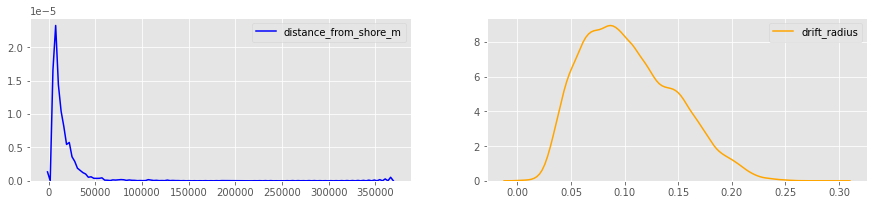

In [8]:
# Set axis and plot size
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 3))

# Plot variables dist
sns.kdeplot(anchorages['distance_from_shore_m'], color='blue', ax=ax1)
sns.kdeplot(anchorages['drift_radius'], color='orange', ax=ax2)

plt.show()

By looking at the distribution we can see how problematic using a mean or median fill to NaN would be. Let's investigate how to fill the `distance_from_shore_m` column first.

In [9]:
# Take a look at the ports with null values
lb_null_dist = anchorages.loc[anchorages['distance_from_shore_m'].isnull(), 'label'].unique()
len(lb_null_dist)

8

Since there're few different ports. Let's compute the mean for each port and use it to fill the NaN values.

In [10]:
for port in lb_null_dist:
    # Set boolean filters
    mean_mask = (anchorages['label'] == port)
    null_mask = (anchorages['distance_from_shore_m'].isnull() & mean_mask)
    
    # Calculate mean
    mean = anchorages.loc[mean_mask, 'distance_from_shore_m'].mean()
    # Fill
    anchorages.loc[null_mask, 'distance_from_shore_m'] = mean

In [11]:
# Drop this row since it's
# the only row with that label
anchorages.drop(index=[24], inplace=True)

Take a closer look at the drift column.

In [12]:
anchorages.loc[anchorages['drift_radius'].isnull()]

,s2id,lat,lon,label,iso3,distance_from_shore_m,drift_radius
20,8efe7543,11.840606,1001.000000,POINTE NOIRE,COG,4117.346939,NaN
1272,303801c5,4.959410,97.773552,IDI,IDN,0.000000,NaN
2307,904ce235,-6.942703,-79.849616,ETEN,PER,0.000000,NaN
2308,904ce23f,-6.957226,-79.848870,ETEN,PER,0.000000,NaN
2309,904ce237,-6.947116,-79.850459,ETEN,PER,0.000000,NaN
...,...,...,...,...,...,...,...
123698,345d3871,25.265640,121.840600,KEELUNG CITY,TWN,14000.000000,NaN
138872,357a2753,37.007128,125.921901,ULDO-RI,KOR,6000.000000,NaN
160991,3ef45bed,25.275334,56.458664,FUJAIRAH,ARE,9000.000000,NaN
161671,6d6fa0df,-37.903772,177.160914,WHAKATANE,NZL,9000.000000,NaN


Let's use the same approach to fill thoses NaN values.

In [13]:
lb_null_drift = anchorages.loc[anchorages['drift_radius'].isnull(), 'label'].unique()

for port in lb_null_drift:
    # Set boolean filters
    mean_mask = (anchorages['label'] == port)
    null_mask = (anchorages['drift_radius'].isnull() & mean_mask)
    
    # Calculate mean
    mean = anchorages.loc[mean_mask, 'drift_radius'].mean()
    
    # Fill
    anchorages.loc[null_mask, 'drift_radius'].fillna(mean)

For the label column, since we'll be using this column a lot to aggregate data let's drop those missing values. Just 6 rows.

In [14]:
# Drop rows with labels null
anchorages.dropna(subset=['label'], inplace=True)

# Check results
anchorages.isnull().sum()

s2id                       0
lat                        0
lon                        0
label                      0
iso3                       0
distance_from_shore_m      0
drift_radius             168
dtype: int64

Some rows kept with null values, maybe this is due to the fact that they have unique labels. Thus, it's not possible to infer the mean for those cases. Let's check it out.

In [15]:
len(anchorages.loc[anchorages['drift_radius'].isnull(), 'label'].unique())

125

Exactly! Let's fill them with the general median value since it's a less sensible statistic.

In [16]:
# Fill NaN
median = anchorages['drift_radius'].median()
anchorages['drift_radius'].fillna(median, inplace=True)

# Now check for results
anchorages.isnull().sum()

s2id                     0
lat                      0
lon                      0
label                    0
iso3                     0
distance_from_shore_m    0
drift_radius             0
dtype: int64

Let's change the column names to something shorter.

In [17]:
# Mapper dict
new_columns = {'distance_from_shore_m': 'd_shore', 'drift_radius': 'dr'}
# Change names
anchorages.rename(columns=new_columns, inplace=True)

# Check results
anchorages.columns

Index(['s2id', 'lat', 'lon', 'label', 'iso3', 'd_shore', 'dr'], dtype='object')

### 3.2 Fishing vessels

Now let's clean the other dataset.

In [18]:
fishing_vessels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73009 entries, 0 to 73008
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mmsi          73009 non-null  int64  
 1   flag          73009 non-null  object 
 2   geartype      73006 non-null  object 
 3   length        73007 non-null  float64
 4   tonnage       73007 non-null  float64
 5   engine_power  72999 non-null  float64
 6   active_2012   73009 non-null  bool   
 7   active_2013   73009 non-null  bool   
 8   active_2014   73009 non-null  bool   
 9   active_2015   73009 non-null  bool   
 10  active_2016   73009 non-null  bool   
dtypes: bool(5), float64(3), int64(1), object(2)
memory usage: 3.7+ MB


No problem with the data type of each column. In the flag column, as stated by the dataset schema, a value of "UNK" means the flag state is unknown. Let's transform this column.

In [19]:
# Substitute UNK for null
fishing_vessels.loc[fishing_vessels['flag'] == 'UNK', 'flag'] = np.nan

# Count null values
fishing_vessels.isnull().sum()

mmsi              0
flag            139
geartype          3
length            2
tonnage           2
engine_power     10
active_2012       0
active_2013       0
active_2014       0
active_2015       0
active_2016       0
dtype: int64

In [20]:
# Check the null rows for engine_power
fishing_vessels.loc[fishing_vessels['engine_power'].isnull()]

,mmsi,flag,geartype,length,tonnage,engine_power,active_2012,active_2013,active_2014,active_2015,active_2016
477,503006464,AUS,drifting_longlines,106.748673,570.466040,NaN,False,False,True,False,False
486,503006466,AUS,drifting_longlines,147.087712,903.776798,NaN,False,False,True,False,False
4277,412417036,CHN,trawlers,NaN,NaN,NaN,False,True,True,True,True
35634,412419325,CHN,fixed_gear,NaN,NaN,NaN,False,True,True,True,False
42811,413790827,CHN,fixed_gear,40.405499,29.510305,NaN,False,True,True,True,True
48070,413044808,CHN,drifting_longlines,57.840488,105.377523,NaN,True,True,True,False,False
67467,273999000,RUS,drifting_longlines,144.811058,3681.300617,NaN,False,False,False,False,True
70406,365961216,NaN,drifting_longlines,98.670585,334.784605,NaN,False,False,True,True,False
70433,335559149,NaN,drifting_longlines,54.286684,375.798390,NaN,False,False,True,True,False
72618,366816343,USA,drifting_longlines,54.390197,306.236469,NaN,False,False,True,True,False


Let's drop all row with nulls values for `geartype`, `length`, `tonnage`, `engine_power`.

In [21]:
# Set columns
cols = ['geartype', 'length', 'tonnage', 'engine_power']

# Drop rows
fishing_vessels.dropna(axis=0, subset=cols, inplace=True)

# Check results
fishing_vessels.isnull().sum()

mmsi              0
flag            137
geartype          0
length            0
tonnage           0
engine_power      0
active_2012       0
active_2013       0
active_2014       0
active_2015       0
active_2016       0
dtype: int64

Now, what to do with the row with null for the flag column? Let's drop them.

In [22]:
fishing_vessels.dropna(subset=['flag'], inplace=True)

# Check results
fishing_vessels.isnull().sum()

mmsi            0
flag            0
geartype        0
length          0
tonnage         0
engine_power    0
active_2012     0
active_2013     0
active_2014     0
active_2015     0
active_2016     0
dtype: int64

Change column names to something shorter as well.

In [23]:
# Mapper to new names
new_columns = {'geartype': 'gear', 'engine_power': 'power', 
               'active_2012': '2012', 'active_2013': '2013', 
               'active_2014': '2014', 'active_2015': '2015',
               'active_2016': '2016'}
# Change
fishing_vessels.rename(columns=new_columns, inplace=True)

# Check results
fishing_vessels.columns

Index(['mmsi', 'flag', 'gear', 'length', 'tonnage', 'power', '2012', '2013',
       '2014', '2015', '2016'],
      dtype='object')

***
## 4. Exploratory analysis
Now we start the interesting part of this notebook. We'll start looking at the anchorages dataset. This will help us understand the market of ports and anchorages worldwide. The goal is to decide which country to establish my base port. The underlying assumption is that a good supply of anchorages means cheaper prices for them.

After that, we proceed to the fishing vessels dataset. The goal is to find the best size and gear type for my vessel. We'll also look at how is the competitiveness by country to some specific vessel type. The underlying assumption is that many vessels of the same size and gears mean the market is crowded.

### 4.1 Anchorages
#### 4.1.1 General distribution

In [24]:
# Basic statistics
anchorages.describe()

,lat,lon,d_shore,dr
count,166505.000000,166505.000000,166505.000000,1.665050e+05
mean,29.058610,55.511417,5661.936406,1.039381e-01
std,20.616862,75.150299,14585.591463,4.326485e-02
min,-64.827541,-179.938035,0.000000,8.522262e-13
25%,22.883170,5.314315,0.000000,7.007390e-02
50%,31.764140,79.720307,1000.000000,9.844702e-02
75%,40.375149,119.986898,6000.000000,1.342517e-01
max,79.558851,1001.000000,368000.000000,2.977809e-01


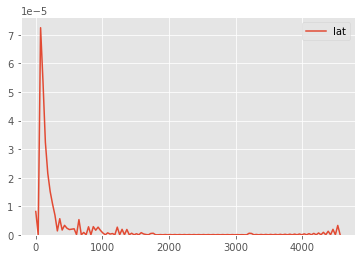

In [25]:
# Aggregate
anchorages_per_port = anchorages.groupby('label').count().iloc[:, 1]

# Plot kdeplot
sns.kdeplot(anchorages_per_port)
plt.show()

In [26]:
anchorages_per_port.describe()

count    31853.000000
mean         5.227294
std         46.077766
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       4565.000000
Name: lat, dtype: float64

We can see that almost all ports have 2 or fewer anchorages. Let' create a column to classify the big port (with more than 10 anchorages).

In [27]:
# Select columns
labels_big_ports = anchorages_per_port.loc[anchorages_per_port > 10].index

# Create new boolean column
# true if label has more 
# than 10 anchorages
anchorages['big'] = anchorages['label'].apply(lambda x: x in labels_big_ports)

# Let's see which percent of anchorages
# are located at those big ports
big_anchorages = anchorages['big'].sum()
anchorages_perc = big_anchorages / anchorages.shape[0] * 100

# Show
print('{:.2f}% of the anchorages are located at big ports.'.format(anchorages_perc))

70.42% of the anchorages are located at big ports.


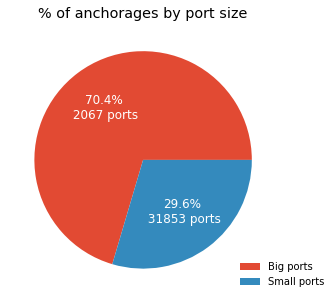

In [28]:
# Create axis
fig, ax = plt.subplots(figsize=(9, 5), subplot_kw=dict(aspect="equal"))

# Data to plot
data = [anchorages_perc, 100-anchorages_perc]
labels = ['Big ports', 'Small ports']
# Quantitity of ports by class
qtd = [len(labels_big_ports), anchorages_per_port.shape[0]]

# Junky solution but worked.
# It's used to write the pct
# and total number of ports
def func(pct, l):
    # Very junky
    if pct > 50:
        q = l[0]
    else:
        q = l[1]
    
    return "{:.1f}%\n {} ports".format(pct, q)

# Plot
wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, qtd), textprops=dict(color="w"))
# Change legend box config
ax.legend(wedges, labels, loc="lower right", bbox_to_anchor=(.7, 0, 0.5, 1), framealpha=0)
# Text size config
plt.setp(autotexts, size=12)
# Title
ax.set_title('% of anchorages by port size')

# Show plot
plt.show()

This graph shows us that more than half of the anchorages are located at big ports. The other 30% of anchorages are spread throughout more than 30 thousand ports. Anchorages supply is controlled by a few major players.

#### 4.1.2 Concentration by country
To decide where to establish my anchorage, let's investigate the control over anchorages by country. We'll use big ports classification as well to investigate the potential countries.

In [29]:
# Count how many anchorages by country
country_port = anchorages.groupby(by=['iso3', 'label']).count()['s2id']
anchorages_per_country = country_port.groupby(by=['iso3']).sum()

anchorages_per_country.describe()

count      209.000000
mean       796.674641
std       3925.839108
min          1.000000
25%         29.000000
50%         92.000000
75%        441.000000
max      54269.000000
Name: s2id, dtype: float64

It's possible to see that the number of anchorages can vary a lot. The concentration also happens between countries. Now let's see port concentration.

In [30]:
ports_per_country = {}

# Count ports per country
for indexes, value in country_port.items():
    if indexes[0] in ports_per_country:
        ports_per_country[indexes[0]] += 1
    else:
        ports_per_country[indexes[0]] = 1
        
ports_per_country = pd.Series(ports_per_country)

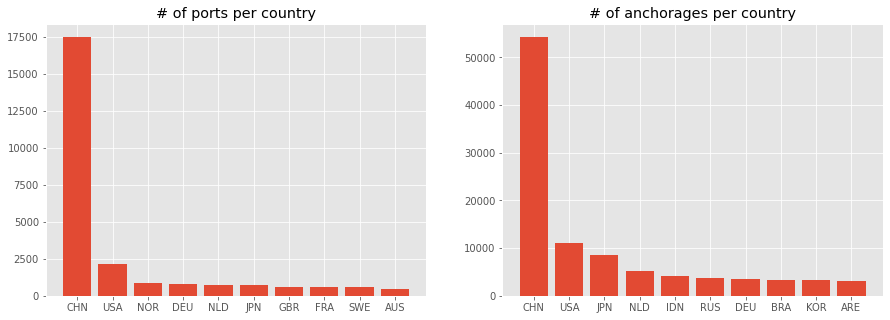

In [31]:
# Calculate top10
top10_ports = ports_per_country.sort_values(ascending=False).head(10)
top10_anchorages = anchorages_per_country.sort_values(ascending=False).head(10)

# Start plot figure
plt.figure(figsize=(15, 5))
# Plot 1
plt.subplot(121)
plt.bar(range(10), top10_ports)
plt.xticks(range(10), top10_ports.index)
plt.title('# of ports per country')
# Plot 2
plt.subplot(122)
plt.bar(range(10), top10_anchorages)
plt.xticks(range(10), top10_anchorages.index)
plt.title('# of anchorages per country')

plt.show()

Indeed, CHN and USA control a big part of both ports and anchorages. Besides de top 2, all other countries in the top 10 port are not necessary in the same order for the top 10 anchorages. This is possible to the fact that countries with big ports tend to have fewer smaller ports. Let's investigate this pattern.

In [32]:
# Select only anchorages in big ports
big_ports = anchorages[anchorages['big'] == True]

# Count big ports per country
country_big_port = big_ports.groupby(by=['iso3', 'label']).count()['s2id']
anchorages_big_per_country = country_big_port.groupby(by=['iso3']).sum()

# Count anchorages per country
big_ports_per_country = {}

# Count ports per country
for indexes, value in country_big_port.items():
    if indexes[0] in big_ports_per_country:
        big_ports_per_country[indexes[0]] += 1
    else:
        big_ports_per_country[indexes[0]] = 1
        
big_ports_per_country = pd.Series(big_ports_per_country)

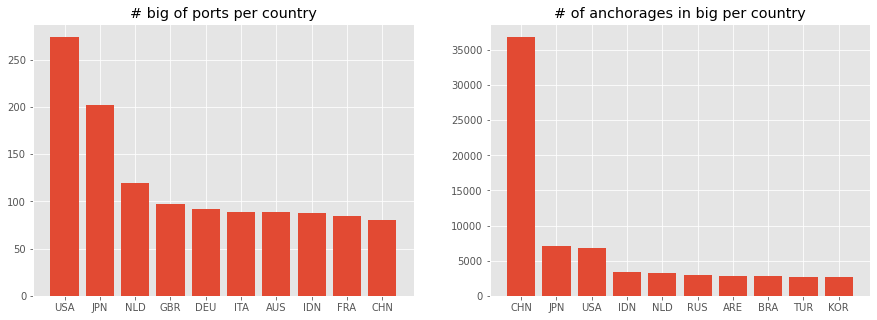

In [33]:
# Calculate top10
top10_ports_big = big_ports_per_country.sort_values(ascending=False).head(10)
top10_anchorages_big = anchorages_big_per_country.sort_values(ascending=False).head(10)

# Start plot figure
plt.figure(figsize=(15, 5))
# Plot 1
plt.subplot(121)
plt.bar(range(10), top10_ports_big)
plt.xticks(range(10), top10_ports_big.index)
plt.title('# big of ports per country')
# Plot 2
plt.subplot(122)
plt.bar(range(10), top10_anchorages_big)
plt.xticks(range(10), top10_anchorages_big.index)
plt.title('# of anchorages in big per country')

plt.show()

One interesting finding here is that CHN has a few big ports than other top 10 countries. But in those big ports is clear that CHN operates on another level of scale, not even comparing to the USA.

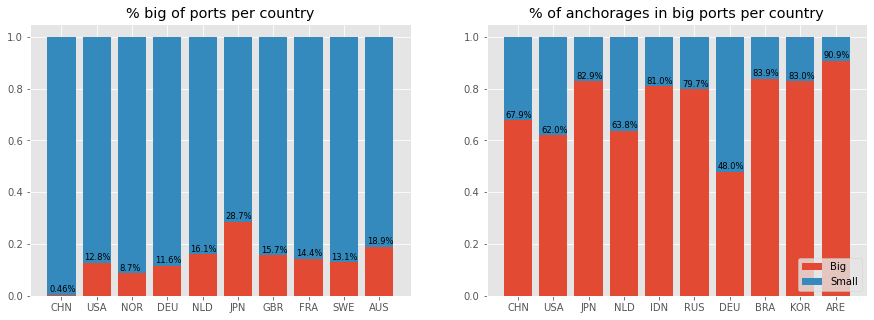

In [34]:
# Calculate total for each country that has big ports
tot_big_ports = ports_per_country[big_ports_per_country.index]
tot_big_anchorages = anchorages_per_country[anchorages_big_per_country.index]
# Calculate percentages
perc_big_port = big_ports_per_country / tot_big_ports
perc_big_anchorages = anchorages_big_per_country / tot_big_anchorages

# Calculate top10
top10_ports = perc_big_port[top10_ports.index]
top10_anchorages = perc_big_anchorages[top10_anchorages.index]

# Start plot figure
plt.figure(figsize=(15, 5))

# Plot 1
plt.subplot(121)
bar1 = plt.bar(range(10), top10_ports)
# Plot stacked bar
bar2 = plt.bar(range(10), 1-top10_ports, bottom=top10_ports)
# Plot percentages
# China wasn't aligning
plt.text(0-0.35, top10_ports[0]+.01, '{:.2f}%'.format(100*(top10_ports[0])), size='small')
# All others
for i in range(1, 10):
    plt.text(i-0.35, top10_ports[i]+.01, '{:.1f}%'.format(100*(top10_ports[i])), size='small')
# Set xticks names and title
plt.xticks(range(10), top10_ports.index)
plt.title('% big of ports per country')
#plt.legend((bar1[0], bar2[0]), ('Big', 'Small'))

# Plot 2
plt.subplot(122)
bar3 = plt.bar(range(10), top10_anchorages)
# Stacked bar
bar4 = plt.bar(range(10), 1-top10_anchorages, bottom=top10_anchorages)
# Plot percentages
for i in range(10):
    plt.text(i-0.35, top10_anchorages[i]+.01, '{:.1f}%'.format(100*(top10_anchorages[i])), size='small')
# Set all other info
plt.legend((bar3[0], bar4[0]), ('Big', 'Small'), loc='lower right')
plt.xticks(range(10), top10_anchorages.index)
plt.title('% of anchorages in big ports per country')

plt.show()

For CHN, more than half of its anchorages are in big ports but it has a massive number of small ports. This also confirms that CHN operates its big ports on a massive scale. JPN has many large ports and its operations are concentrated in them. IDN, RUS, ARE, BRA, TUR, KOR are also very concentrated in their big ports operations. USA has a large proportion of small ports but the big ones concentrate more than half of the anchorages.

In [35]:
# Calculate concentration of ports by country
ports_per_country10 = ports_per_country.sort_values(ascending=False).head(10)
others_p = ports_per_country.sum() - ports_per_country10.sum()

# Set labels before append others value
ports_labels = list(ports_per_country10.index)
ports_labels.append('Others')

ports_per_country10 = ports_per_country10.append(pd.Series(others_p))

# Calculate concentration of anchorages by country
anchorages_per_country10 = anchorages_per_country.sort_values(ascending=False).head(10)
others_a = anchorages_per_country.sum() - anchorages_per_country10.sum()

# Same here
anchorages_labels = list(anchorages_per_country10.index)
anchorages_labels.append('Others')

anchorages_per_country10 = anchorages_per_country10.append(pd.Series(others_a))

# Calculate concentration of big ports by country
big_ports10 = big_ports_per_country[ports_per_country10.index[:-1]]
others_big_p = tot_big_ports.sum() - big_ports10.sum()
big_ports10 = big_ports10.append(pd.Series(others_big_p))

# Calculate concentration of anchorages in big ports by country
big_anchorages10 = anchorages_big_per_country[anchorages_per_country10.index[:-1]]
others_big_a = tot_big_anchorages.sum() - big_anchorages10.sum()
big_anchorages10 = big_anchorages10.append(pd.Series(others_big_p))

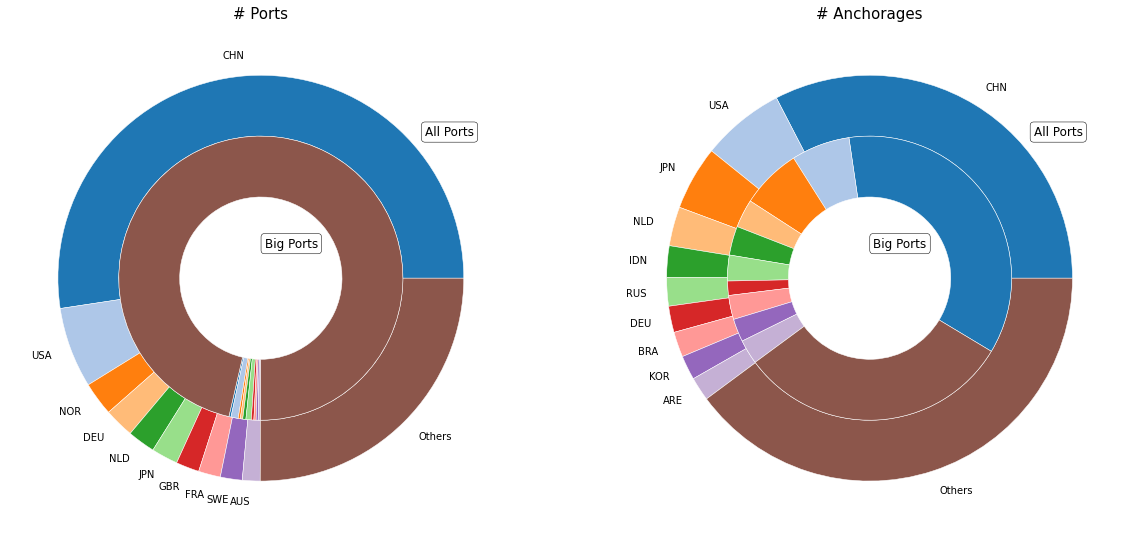

In [36]:
# Set figure size
plt.figure(figsize=(20, 10))

# Size for inner circle
size=.3
# Color map to countries
cmap = plt.get_cmap('tab20')
cmap = cmap(range(11))

# Plot ports
plt.subplot(121)
# Text big ports
plt.text(
    .15, .17, 
    'Big Ports', 
    size=12,
    ha="center", 
    va="center",
    bbox=dict(boxstyle="round",
              ec=(0, 0, 0),
              fc=(1, 1, 1),
              )
    )
# Text ports
plt.text(
    .93, .72, 
    'All Ports', 
    size=12,
    ha="center", 
    va="center",
    bbox=dict(boxstyle="round",
              ec=(0, 0, 0),
              fc=(1, 1, 1),
              )
    )
# Outer circle
plt.pie(
    ports_per_country10, 
    labels=ports_labels, 
    radius=1, 
    colors=cmap, 
    wedgeprops=dict(width=size, edgecolor='w')
)
# Inner circle
plt.pie(
    big_ports10, 
    labels=ports_labels, 
    radius=1-size, 
    colors=cmap, 
    wedgeprops=dict(width=size, edgecolor='w'),
    startangle=257,
    labeldistance=None
)
plt.title('# Ports', size=15)

# Plot anchorages
plt.subplot(122)
# Text
plt.text(
    .15, .17, 
    'Big Ports', 
    size=12,
    ha="center", 
    va="center",
    bbox=dict(boxstyle="round",
              ec=(0, 0, 0),
              fc=(1, 1, 1),
              )
    )
# Text
plt.text(
    .93, .72, 
    'All Ports', 
    size=12,
    ha="center", 
    va="center",
    bbox=dict(boxstyle="round",
              ec=(0, 0, 0),
              fc=(1, 1, 1),
              )
         )
# Outer circle
plt.pie(
    anchorages_per_country10, 
    labels=anchorages_labels, 
    radius=1, 
    colors=cmap, 
    wedgeprops=dict(width=size, edgecolor='w')
)
# Inner circle
plt.pie(
    big_anchorages10, 
    labels=anchorages_labels, 
    radius=1-size, 
    colors=cmap, 
    wedgeprops=dict(width=size, edgecolor='w'),
    startangle=-31,
    labeldistance=None
)
plt.title('# Anchorages', size=15)

plt.show()

Almost 75% of ports are located in the top10 and 2 thirds of the anchorages are in the top10 anchorages countries. It only shows that even country-wise, the supply of anchorages is concentrated. The counterintuitive pattern here is that those countries in the top 10 ports control only a small fraction of the big ports count. One hypothesis is that the countries outside the top 10 have big ports but operate them on a smaller scale.

All that said, it's hard to decide which country is the best country to establish the anchorage. Let's continue the investigation, using now the vessels dataset.

### 4.2 Fishing Vessels dataset
We'll look for the most common type of gear and their average sizes. The assumption is that the most common sizes are the ones most efficient for specific gear.

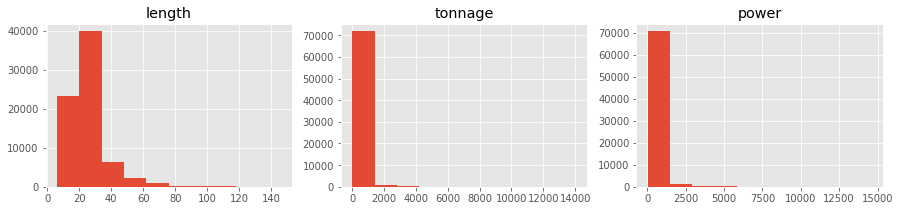

In [37]:
# Set figure size
plt.figure(figsize=(15, 3))

# Plot dist from numerical columns
cols = ['length', 'tonnage', 'power']
# 1 line and 3 columns
plt_idx = 131

# Plot 3 dist
for i in range(3):
    plt.subplot(plt_idx + i)
    plt.hist(fishing_vessels[cols[i]])
    plt.title(cols[i])

plt.show()

In [38]:
fishing_vessels.describe()

,mmsi,length,tonnage,power
count,7.285900e+04,72859.000000,72859.000000,72859.000000
mean,4.188724e+08,25.660942,166.804866,441.458659
std,1.832907e+08,11.586155,422.294540,573.662049
min,9.100000e+01,5.974774,1.000000,14.000000
25%,3.160038e+08,18.692752,45.082370,225.901255
50%,4.124130e+08,23.550000,81.526989,316.355261
75%,4.125001e+08,29.950000,143.153242,444.794729
max,1.057022e+09,145.755014,14055.000000,14601.395619


By the distribution, the great part of vessels is medium size (about 25 meters in length). It is a common size of industrial fishing vessels.

Let's see how the average size change for each type of gear.

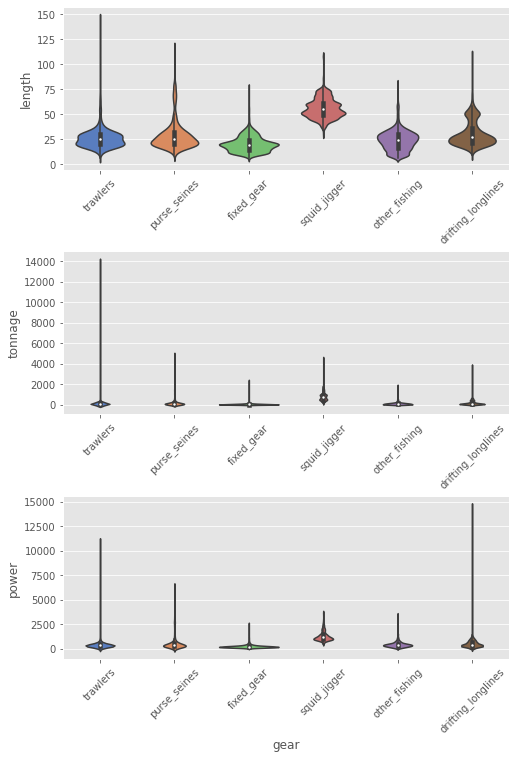

In [39]:
plt.figure(figsize=(8, 12))

plt.subplot(311)
sns.violinplot(y='length', x='gear', data=fishing_vessels, bw=.2, palette="muted")
plt.xticks(rotation=45)

plt.subplot(312)
sns.violinplot(y='tonnage', x='gear', data=fishing_vessels, bw=.2, palette="muted")
plt.xticks(rotation=45)

plt.subplot(313)
sns.violinplot(y=fishing_vessels['power'], x=fishing_vessels['gear'], bw=.2, palette="muted")
plt.xticks(rotation=45)

plt.subplots_adjust(hspace=.5)
plt.show()

In terms of length size, all categories tend to be close. Except for the `squid_jigger` gear type that tends to be bigger than 25 meters. It's interesting to note that the `trawlers` have some outliers in all 3 aspects. The `drifting_longlines` also shows outliers for power, this is due to the drag that a longline can cause.

A big vessel is not in my interest now. Thus, let's remove some outliers to take a closer look at the distribution by gear type. This will help us decide the vessel size and gear. The bounds were arbitrarily chosen.

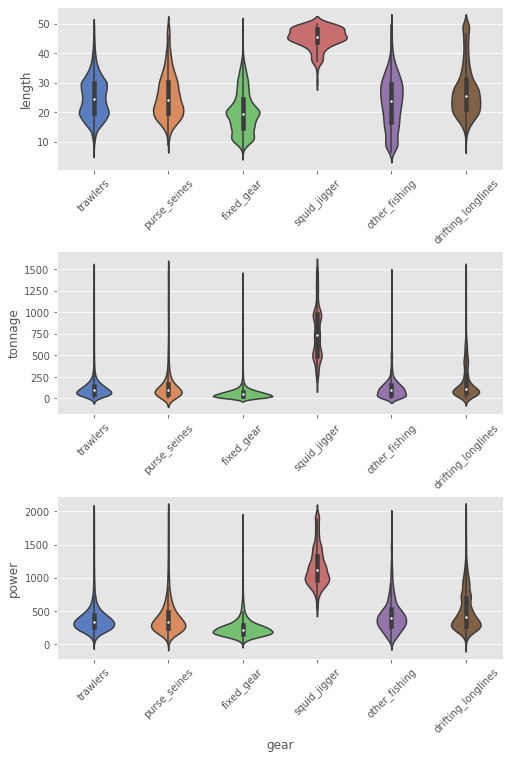

In [40]:
plt.figure(figsize=(8, 12))

plt.subplot(311)
sns.violinplot(y='length', x='gear', data=fishing_vessels.loc[fishing_vessels['length'] < 50], palette="muted")
plt.xticks(rotation=45)

plt.subplot(312)
sns.violinplot(y='tonnage', x='gear', data=fishing_vessels.loc[fishing_vessels['tonnage'] < 1500], bw=.2, palette="muted")
plt.xticks(rotation=45)

plt.subplot(313)
sns.violinplot(y='power', x='gear', data=fishing_vessels.loc[fishing_vessels['power'] < 2000], bw=.2, palette="muted")
plt.xticks(rotation=45)

plt.subplots_adjust(hspace=.5)
plt.show()

It shows that the `squid_jigger` tends to be bigger in size and has more spread sizes. Besides that, it doesn´t present many outliers.

The gear types `trawlers`, `purse_seines`, and `drifting_longlines` appear to be more flexible in size. The `squid_jigger`  needs to be bigger than the mean but it also has some kind of maximum size. Are those big sizes vessels effective? This is a question that this dataset is unable to answer. But since they exist shows that they're the solution available to big fishing vessels.

From our perspective, `squid jiggers` class tends to be bigger, thus not a suitable choice. The `drifting_longlines` are less mobile since it depends on fixed traps. Because of that, the choice should be a `trawlers` or `purse_seines` type.

The `trawler` type has 2 main sizes (20m and 30m), as the `purse_seines` tends to focus on the 20m size. So our choice should be one of those sizes for each type. The gear actually is a choice more based on local regulations and the type of fish that we will catch. Since gear type can define what type of fish will work with, we'll look at how crowded are those markets by country.

### 4.3 Picking the final country and vessel
The idea now is to filter out some countries, to look at their market by gear type. This will help us decide which size to choose as well.

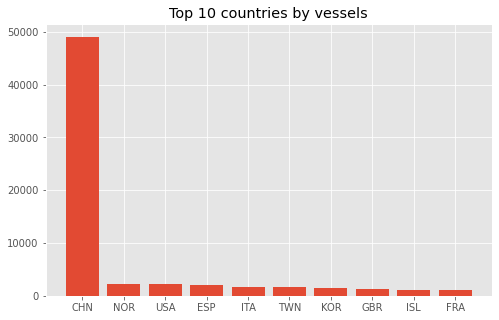

In [41]:
# Count vessels by country
vessels_by_country = fishing_vessels.groupby(by=['flag']).count().iloc[:, 1]
# Top 10
top10country_vessels = vessels_by_country.sort_values(ascending=False).head(10)

# Start plot figure
plt.figure(figsize=(8, 5))
# Plot
plt.bar(range(10), top10country_vessels)
plt.xticks(range(10), top10country_vessels.index)
plt.title('Top 10 countries by vessels')

plt.show()

Countries vary their size a lot, thus it's best to look for the ratio of vessels against anchorages number.  We're looking for countries with a great number of available anchorages, which I hope would mean cheaper anchorages. We'll investigate the top10 countries by vessels and the top10 ratios as well.

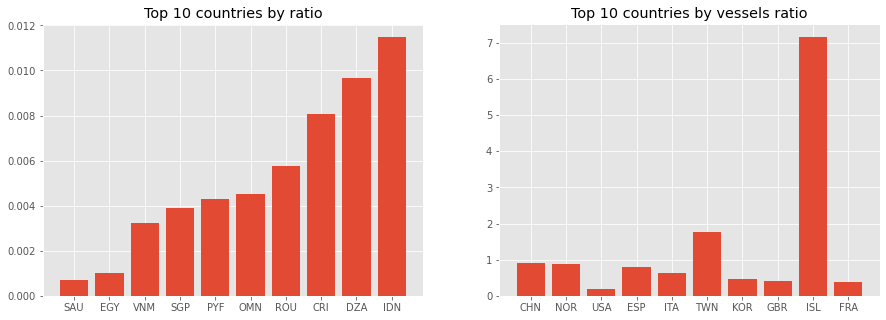

In [42]:
anchorages_vessels_country = pd.concat([anchorages_per_country, vessels_by_country], axis=1, join='inner')
anchorages_vessels_country.columns = ['anchorages', 'vessels']
anchorages_vessels_country['ratio'] = anchorages_vessels_country['vessels'] / anchorages_vessels_country['anchorages']

top10country_vessels_ratio = anchorages_vessels_country.loc[top10country_vessels.index]
top10_ratios = anchorages_vessels_country.sort_values(by='ratio', ascending=True).head(10)

# Start plot figure
plt.figure(figsize=(15, 5))
# Plot 1
plt.subplot(121)
plt.bar(range(10), top10_ratios['ratio'])
plt.xticks(range(10), top10_ratios.index)
plt.title('Top 10 countries by ratio')

plt.subplot(122)
plt.bar(range(10), top10country_vessels_ratio['ratio'])
plt.xticks(range(10), top10country_vessels_ratio.index)
plt.title('Top 10 countries by vessels ratio')

plt.show()

In the top 10 countries by vessel number, the USA appears to be a good option, with the lowest (best) ratio.  But we're underestimating the ratio since the vessel dataset doesn't contain all possible vessel types. It is possible that other types of private or leisure boats are using those anchorages. Other choices could be ESP, ITA, or FRA. ITA has the restriction to be confined in the Mediterranean sea, ESP and FRA give the choice to fish in both areas.

The results for the top10 countries by ratio must be investigated before we make an insight. Those values near zero could mean that the vessel data is missing for these countries.

In [43]:
# Total of vessels by country
vessels_by_country[top10_ratios.index]

SAU     1
EGY     1
VNM     2
SGP     6
PYF     1
OMN     1
ROU     3
CRI     1
DZA     4
IDN    48
Name: gear, dtype: int64

With less than 10 vessels by country, we can state that the data for those countries are unreliable. Let's take a look only for top ratios with more than 50 vessels in total.

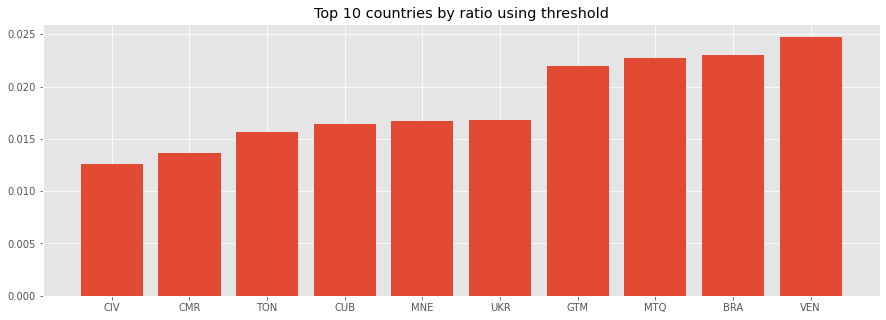

In [44]:
top20_ratios = anchorages_vessels_country.sort_values(by='ratio', ascending=True).iloc[11:21]

# Start plot figure
plt.figure(figsize=(15, 5))
# Plot 1
plt.bar(range(10), top20_ratios['ratio'])
plt.xticks(range(10), top20_ratios.index)
plt.title('Top 10 countries by ratio using threshold')

plt.show()

In this top10 the only countries that aren't small islands or countries are BRA, VEN, and UKR. UKR is too cold for me, and also there's the risk of not being able to fish all year round. VEN is not exactly a politically stable country right now. It leaves us out with BRA, but we also can't guarantee its stability for the next 5 years. Let's add this option and compare it with other countries' gear types to find out if the market is crowded.

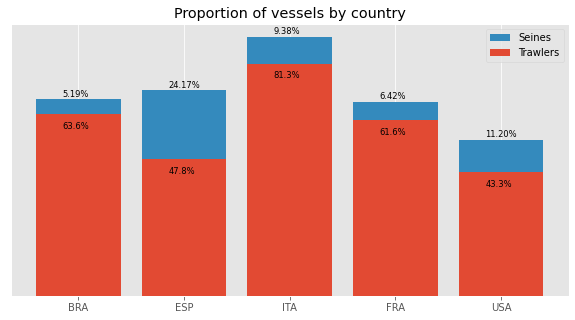

In [45]:
# Strongest candidates
selected = ['BRA', 'ESP', 'ITA', 'FRA', 'USA']

gear_country = fishing_vessels.groupby(by=['flag', 'gear']).count().loc[selected]
proportion = gear_country['length'] / vessels_by_country[selected]

# Lists to stacked bar
purse_prop = []
trawlers_prop = []

for country in selected:
    ps = proportion.loc[(country, 'purse_seines')]
    purse_prop.append(ps)
    tw = proportion.loc[(country, 'trawlers')]
    trawlers_prop.append(tw)
    
plt.figure(figsize=(10, 5))
# Plot bar 1
bar1 = plt.bar(range(len(selected)), trawlers_prop)
# Plot stacked bar
bar2 = plt.bar(range(len(selected)), purse_prop, bottom=trawlers_prop)
# Plot percentages
for i in range(len(selected)):
    plt.text(i-0.15, trawlers_prop[i]-.05, '{:.1f}%'.format(100*(trawlers_prop[i])), size='small')
    plt.text(i-0.15, trawlers_prop[i]+purse_prop[i]+.01, '{:.2f}%'.format(100*(purse_prop[i])), size='small')
# Set xticks names and title
plt.xticks(range(len(selected)), selected)
plt.yticks([])
# Set legend
plt.legend((bar2[0],bar1[0]), ('Seines', 'Trawlers'), loc='upper right')
plt.title('Proportion of vessels by country')

plt.show()

BRA e FRA shows potential to `purse_seines` gear type since the proportions are low. But this fact also makes the maintenance costs of this type of gear expensive in those countries. Less common gear makes it hard to find specialized anchors, mechanics, and spare parts.

ITA losses to the fact that is restricted to only the Mediterranean sea. USA besides the huge potential is not a welcome country to Latin foreigns like me, so it is out of the question.

It leaves us with ESP using `purse_seines` since is not the most crowded gear type in this country.  But also not too rare as well. It has the possibility to work in the Mediterranean sea or the Atlantic, a big market for seafood, and nice weather all year long. The size of the vessel must be around 20 meters since it's a `pursue_seines` type. I'll start improving my spanish right now!

***
# 5. Limitations and further investigation
We have made many assumptions to derive the final answer. This was necessary to answer the question proposed at the beginning. Let's point out some of them right now and their shortcomings. We'll also indicate how complementary data could help us to test those assumptions.

<b>1.</b> Too many ships make the market crowded: we are only looking at the supply side of the market. Without looking for demand is hard to tell if the market is already crowded. The demand can be big enough to accommodate all those vessels. The fishing price for each country could help us in figuring it out.

<b>2.</b> Common vessel size for gear type is the most effective: the assumption here is the wisdom of the crowds. But the mean size could be the product of some kind of regulation, or an old fishing practice that is not necessary anymore. Revenue or production fishing data of each vessel is necessary to test. Only then we could tell lucrative or effective sizes for each gear.

<b>3.</b> Too little of a gear type makes the maintenance costs high: maintenance costs can be derivated by the complexity of the gear as well. Some gear types can be hard to maintain, independent of the market that it is in.

<b>4.</b> Low occupation ratio of anchorages makes better prices: anchorage prices can be derived by some other factors. Like taxes, local regulations, high living costs, competition with other boats, etc. The price for anchorage is needed to test this.